In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv(r'C:\Users\vyshn\Downloads\ecommerce_customer_data.csv')

In [5]:
print(data.head())

   User_ID  Gender  Age   Location Device_Type  Product_Browsing_Time  \
0        1  Female   23  Ahmedabad      Mobile                     60   
1        2    Male   25    Kolkata      Tablet                     30   
2        3    Male   32  Bangalore     Desktop                     37   
3        4    Male   35      Delhi      Mobile                      7   
4        5    Male   27  Bangalore      Tablet                     35   

   Total_Pages_Viewed  Items_Added_to_Cart  Total_Purchases  
0                  30                    1                0  
1                  38                    9                4  
2                  13                    5                0  
3                  20                   10                3  
4                  20                    8                2  


In [13]:
# Summary statistics for numeric columns
numeric_summary = data.describe()
print(numeric_summary)

          User_ID         Age  Product_Browsing_Time  Total_Pages_Viewed  \
count  500.000000  500.000000             500.000000          500.000000   
mean   250.500000   26.276000              30.740000           27.182000   
std    144.481833    5.114699              15.934246           13.071596   
min      1.000000   18.000000               5.000000            5.000000   
25%    125.750000   22.000000              16.000000           16.000000   
50%    250.500000   26.000000              31.000000           27.000000   
75%    375.250000   31.000000              44.000000           38.000000   
max    500.000000   35.000000              60.000000           50.000000   

       Items_Added_to_Cart  Total_Purchases  
count           500.000000       500.000000  
mean              5.150000         2.464000  
std               3.203127         1.740909  
min               0.000000         0.000000  
25%               2.000000         1.000000  
50%               5.000000         2.00

In [11]:
# Summary statistics for non-numeric columns
categorical_summary = data.describe(include='object')
print(categorical_summary)

       Gender Location Device_Type
count     500      500         500
unique      2        8           3
top      Male  Kolkata      Mobile
freq      261       71         178


distribution of age in the dataset:


<Axes: xlabel='Age', ylabel='Count'>

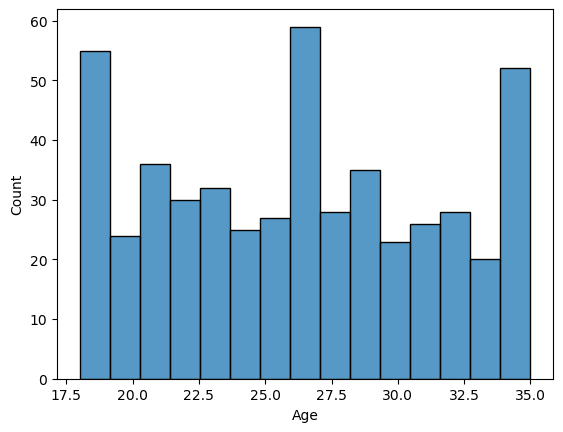

In [16]:
sns.histplot(data, x='Age', bins=15)

gender distribution:

<Axes: xlabel='Gender', ylabel='count'>

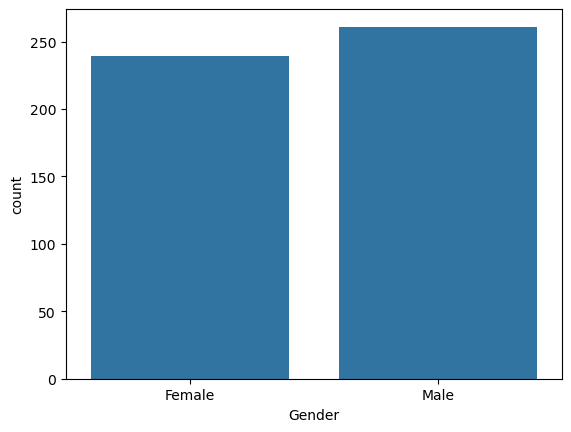

In [17]:
sns.countplot(data,x='Gender')

Analyzing Customer Behaviour:

relationship between the product browsing time and the total pages viewed:

<Axes: xlabel='Product_Browsing_Time', ylabel='Total_Pages_Viewed'>

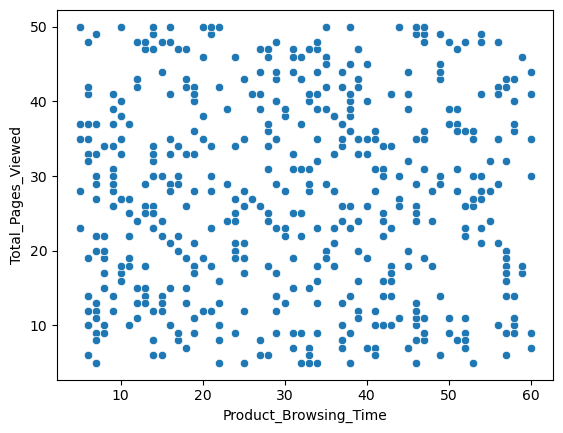

In [18]:
sns.scatterplot(data, x='Product_Browsing_Time', y='Total_Pages_Viewed')

the average total pages viewed by gender:

<Axes: xlabel='Gender', ylabel='Average_Total_Pages_Viewed'>

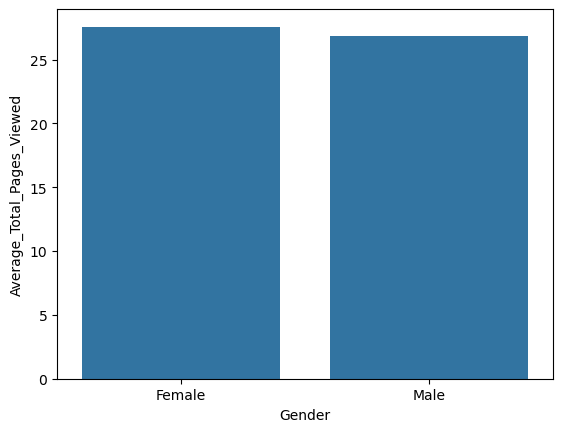

In [36]:
gender_grouped = data.groupby('Gender')['Total_Pages_Viewed'].mean().reset_index()
gender_grouped = gender_grouped.rename(columns={'Gender':'Gender',
                                                'Total_Pages_Viewed':'Average_Total_Pages_Viewed'})
sns.barplot(gender_grouped, x='Gender',y='Average_Total_Pages_Viewed')

average total pages viewed by devices:

<Axes: xlabel='Device_Type', ylabel='Average_Total_pages_viewed'>

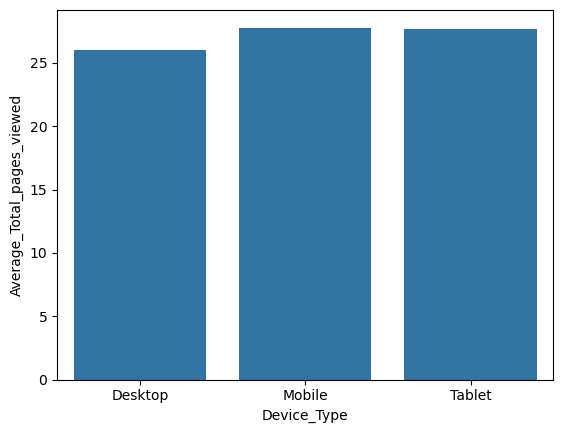

In [48]:
device_grouped = data.groupby('Device_Type')['Total_Pages_Viewed'].mean().reset_index()
device_grouped.columns = ['Device_Type', 'Average_Total_pages_viewed']
sns.barplot(device_grouped, x= 'Device_Type', y='Average_Total_pages_viewed')

calculating the customer lifetime value and visualize segments based on the customer lifetime value:

Customer_lifetime_vale = (Total_purchases * Total_page_viewed) / Age


<Axes: xlabel='Segment', ylabel='Count'>

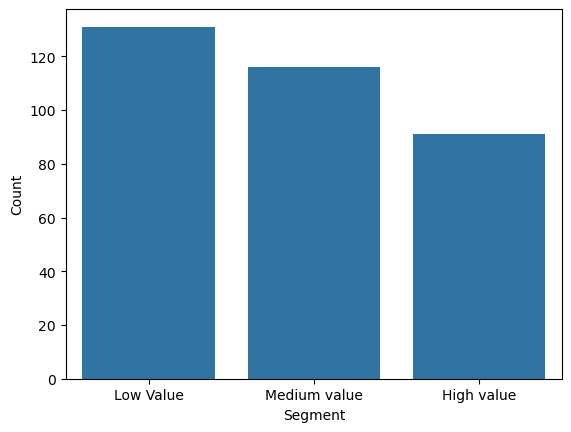

In [51]:
data['CLV'] = (data['Total_Purchases'] * data['Total_Pages_Viewed']) / data['Age']
data['Segment'] = pd.cut(data['CLV'], bins=[1,2.5,5, float('inf')], labels=['Low Value', 'Medium value','High value'])
segment_count = data['Segment'].value_counts().reset_index()
segment_count.columns = ['Segment', 'Count']

sns.barplot(segment_count, x='Segment', y='Count')

let’s have a look at the conversion of the customers:



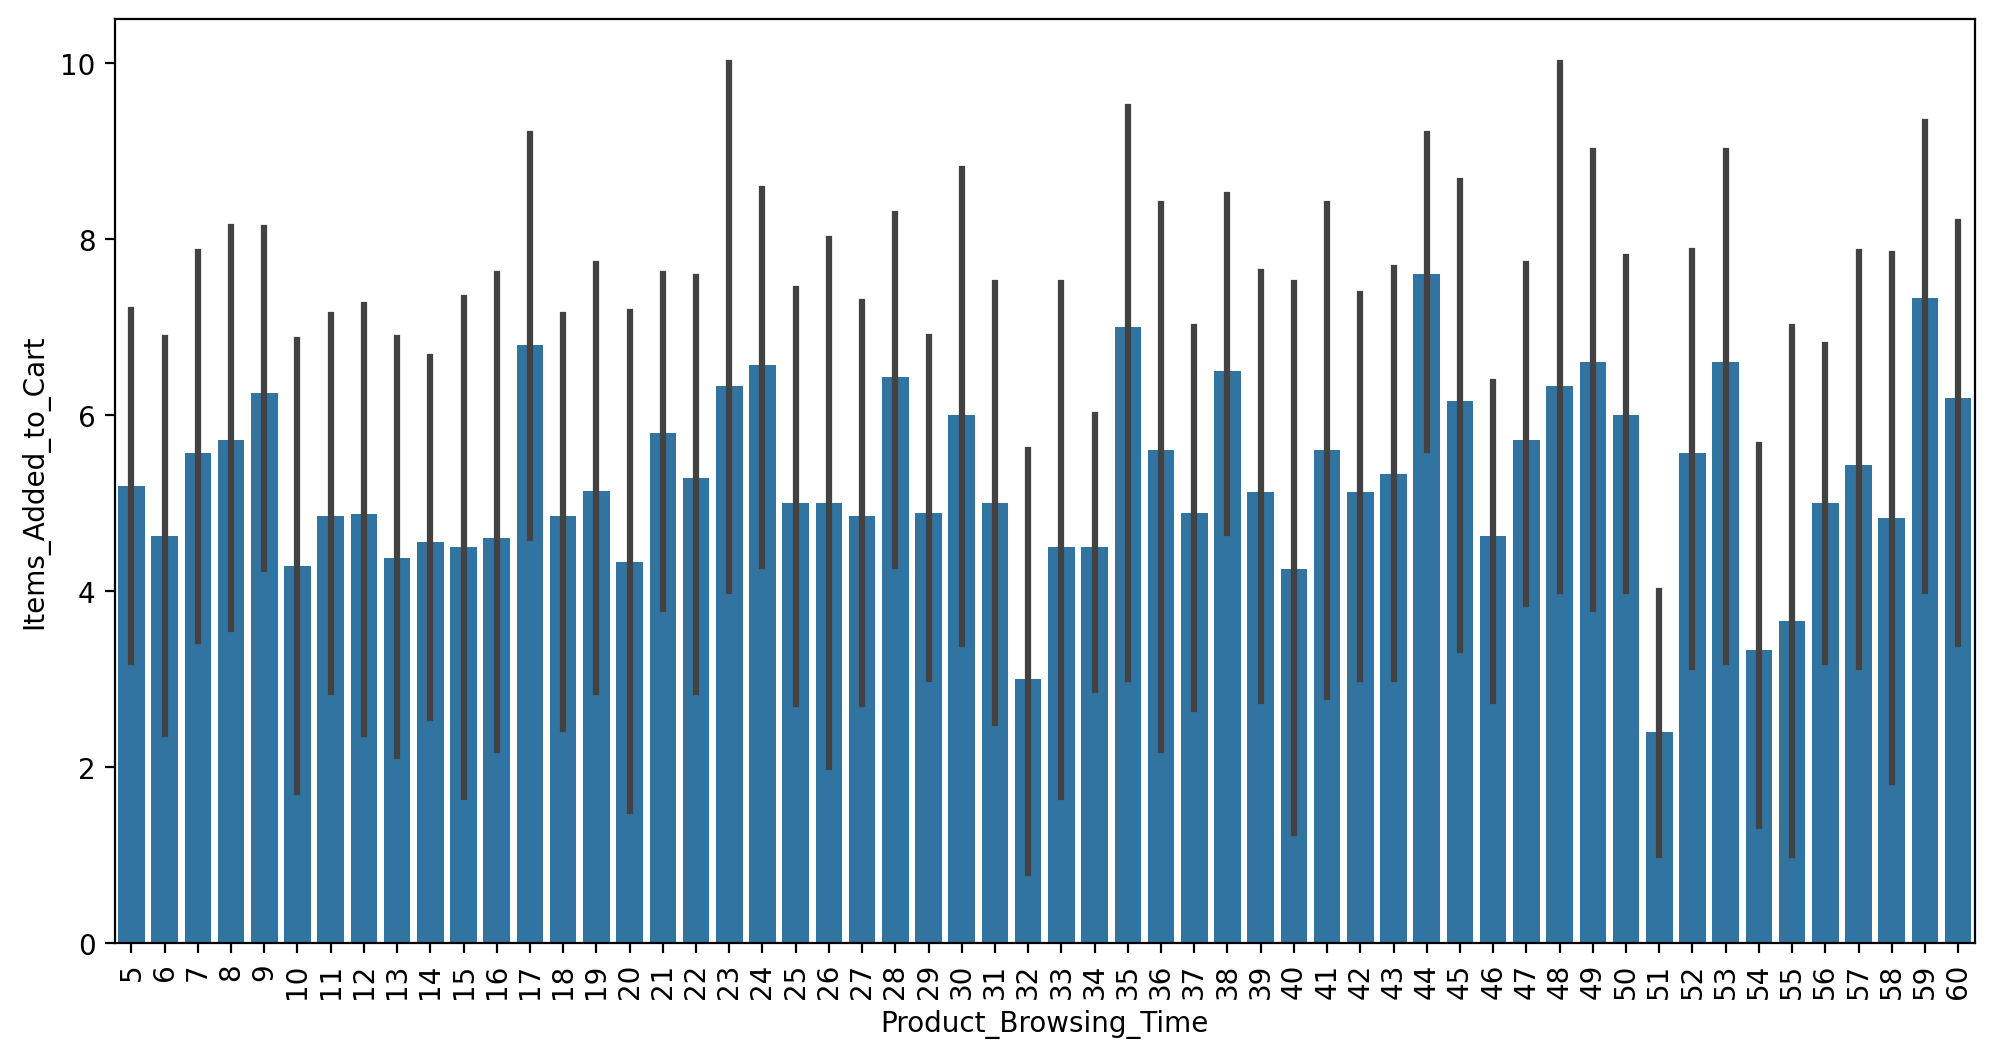

In [56]:
funnel_data = data[['Product_Browsing_Time', 'Items_Added_to_Cart', 'Total_Purchases']]
funnel_data = funnel_data.groupby(['Product_Browsing_Time', 'Items_Added_to_Cart']).sum().reset_index()

plt.figure(figsize=(12,6), dpi=200)
sns.barplot(funnel_data, x='Product_Browsing_Time', y='Items_Added_to_Cart')
plt.xticks(rotation=90);

the churn rate of the customers:



In [57]:
data['Churn'] = data['Total_Purchases'] == 0

In [58]:
data["Churn"].mean()

0.198

A churn rate of 0.198 indicates that a significant portion of customers has churned, and addressing this churn is important for maintaining business growth and profitability.

